In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

dataset = '/content/drive/MyDrive/stroke_data.csv'
df1 = pd.read_csv(dataset)

FileNotFoundError: ignored

In [ ]:
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


# Data info
The orignal dataset include 10 features. From the dataset, we can observe that the number of non-null is not the same over all the features

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# **Observation from the table below**
The table below is the statistics of different features in the dataset

*   min of age is -9
*   max of age is 103
*   25% of the sample are less than 35 years old
*   50% of the sample are less than 52 years old
*   75% of the sample are less than 68 years old






In [ ]:
df1.drop('ever_married', inplace=True, axis = 1)
df1.describe()

,sex,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


# Observation
Since there are negative age and non-sense data exist, we have to clean it by some methods

In [ ]:
df1.loc[df1['age'] == -9]

,sex,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11939,1.0,-9.0,1,0,3,1,124.13,31.4,0,1


array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'work_type'}>,
        <Axes: title={'center': 'Residence_type'}>],
       [<Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'smoking_status'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

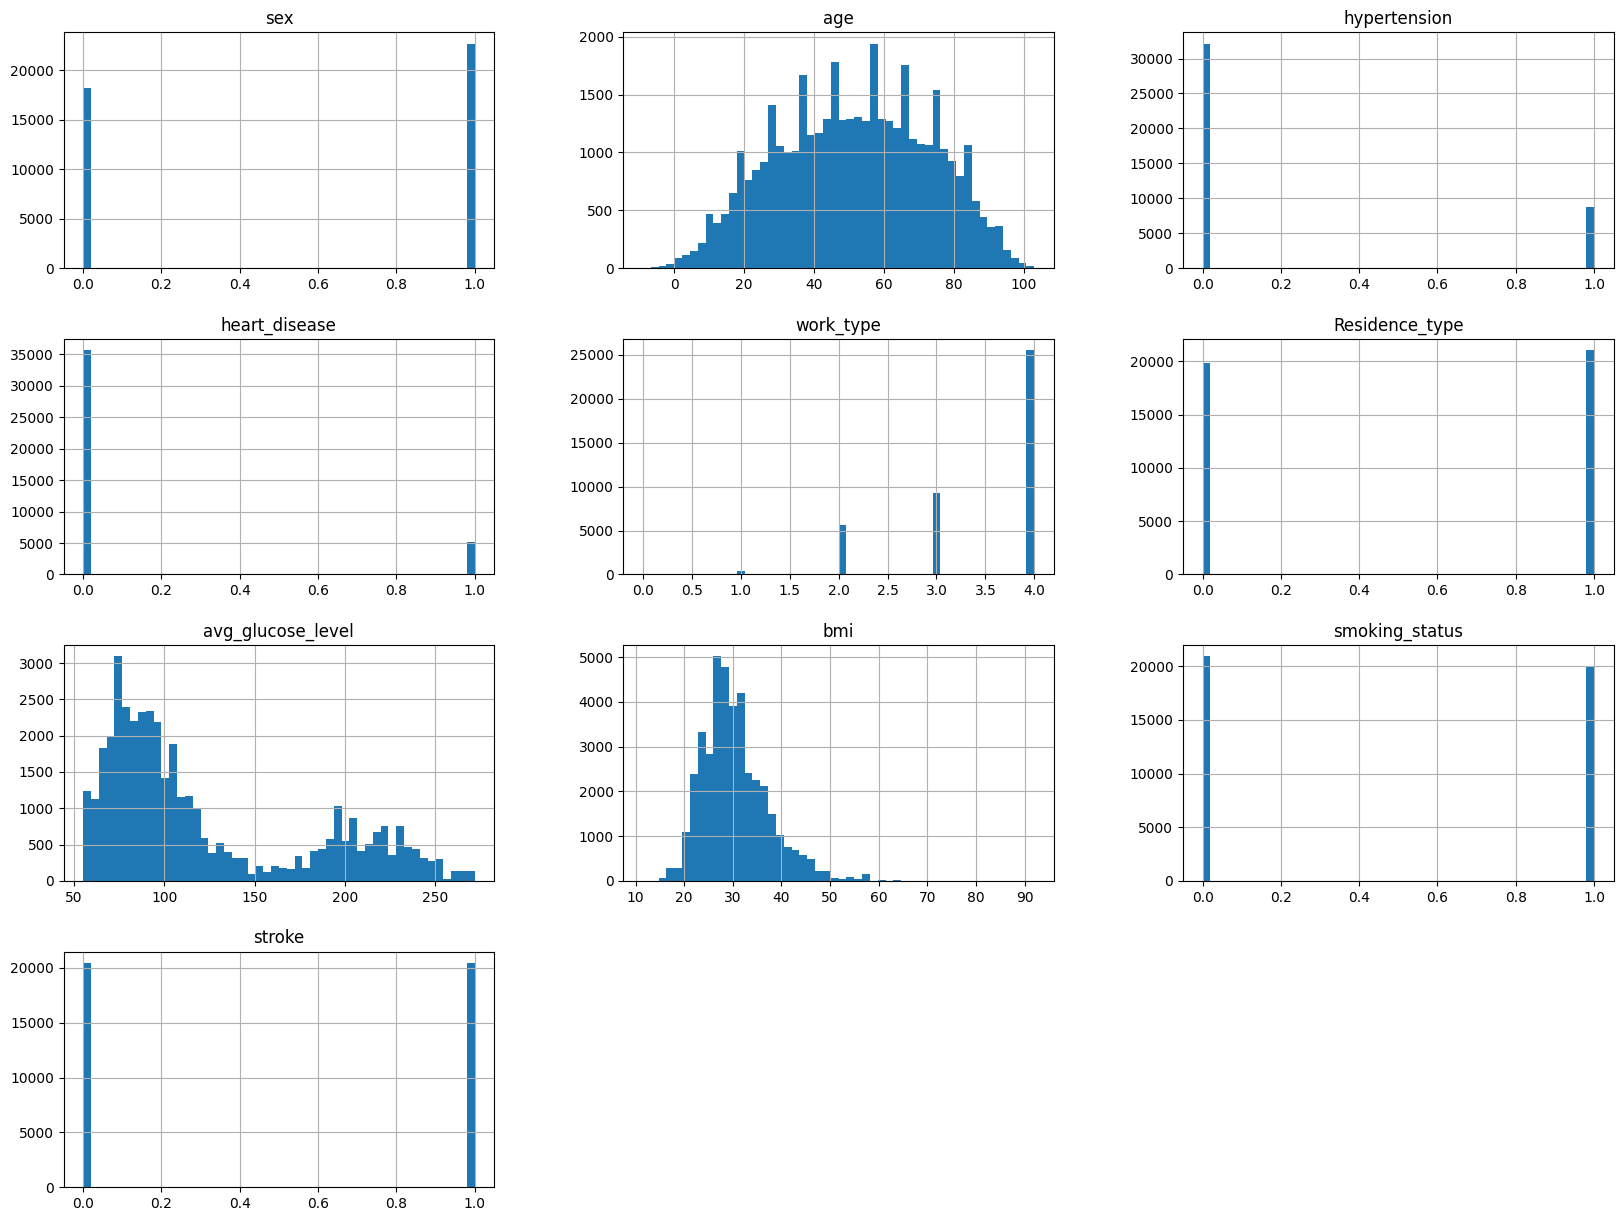

In [ ]:
#From the graph below, we can observe that there are some bmi data are extremely large and this is .
import matplotlib.pyplot as plt

df1.hist(bins=50, figsize=(20,15))


<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

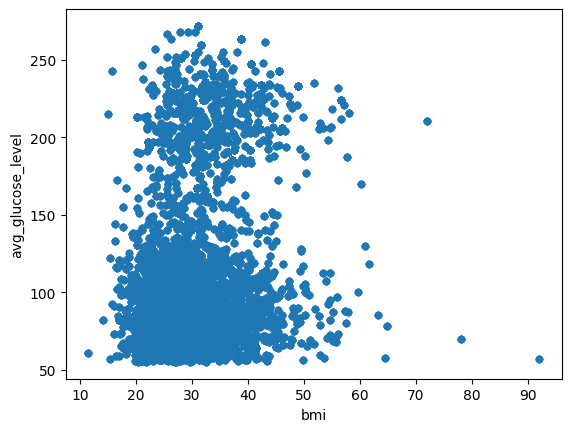

In [ ]:
df1.plot(kind = "scatter", x="bmi", y='avg_glucose_level')

<Axes: xlabel='stroke', ylabel='age'>

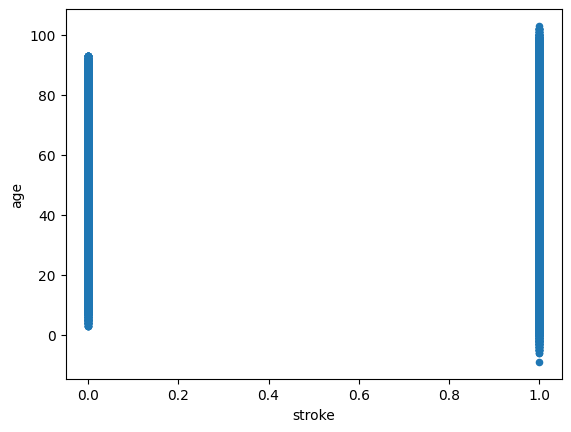

In [ ]:
df1.plot(kind = "scatter", x="stroke", y='age')

In [ ]:
# Clean the the row with null and some non-sense number

def cleaner(df1):
    df1.dropna(inplace=True) # drop the row with NaN value
    df1.drop(df1[df1["age"] <= 0].index, inplace=True) # drop the row with the negative number
    df1.drop(df1[df1["bmi"] >= 53.2].index, inplace=True) # drop the row with extreme bmi
    df1.reset_index(drop=True, inplace=True)

In [ ]:
cleaner(df1)

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'work_type'}>,
        <Axes: title={'center': 'Residence_type'}>],
       [<Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'smoking_status'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

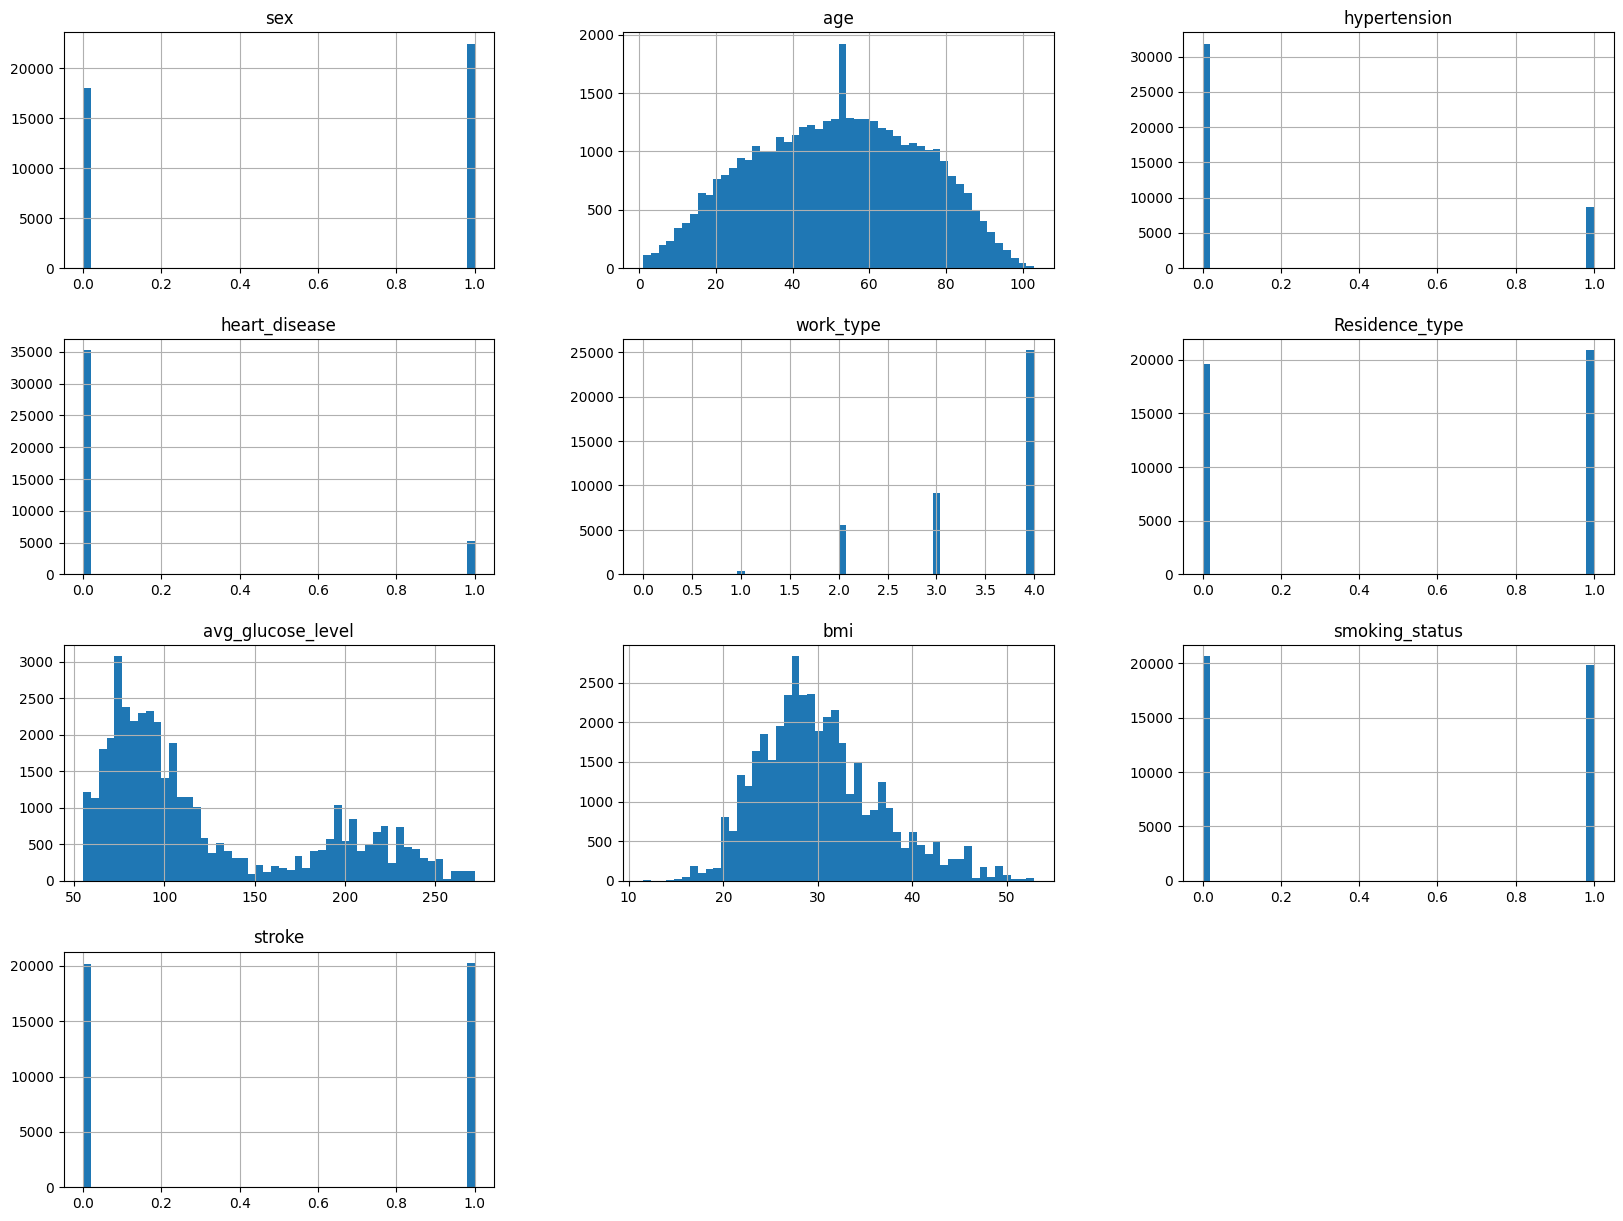

In [ ]:
#The info graph after the dataset was clean.
import matplotlib.pyplot as plt

df1.hist(bins=50, figsize=(20,15))

In [ ]:
df1.to_csv('datasetAfterClean.csv') # dowload the dataset after clecn in CSV format

In [ ]:
df1.describe()

,sex,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000,40491.000000
mean,0.554420,51.450026,0.213480,0.128547,3.458620,0.516139,121.807485,30.177975,0.490578,0.500827
std,0.497036,21.526320,0.409768,0.334702,0.782108,0.499746,57.392036,6.361108,0.499917,0.500005
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,3.000000,0.000000,78.700000,25.800000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,4.000000,1.000000,97.920000,29.300000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,4.000000,1.000000,167.410000,33.700000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,4.000000,1.000000,271.740000,52.900000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming the target column is named 'label'
X = df1.drop('stroke', axis=1)  # Extract features from the DataFrame
y = df1['stroke']  # Extract the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (32392, 9)
y_train shape: (32392,)


In [ ]:
corr_matrix = df1.corr()

In [ ]:
corr_matrix['stroke'].sort_values(ascending=False)

stroke               1.000000
avg_glucose_level    0.264381
hypertension         0.262040
heart_disease        0.224493
smoking_status       0.070800
age                  0.063969
bmi                  0.035370
work_type            0.025997
Residence_type       0.013759
sex                 -0.111211
Name: stroke, dtype: float64

array([[<Axes: xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <Axes: xlabel='hypertension', ylabel='avg_glucose_level'>,
        <Axes: xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <Axes: xlabel='smoking_status', ylabel='avg_glucose_level'>,
        <Axes: xlabel='age', ylabel='avg_glucose_level'>,
        <Axes: xlabel='stroke', ylabel='avg_glucose_level'>],
       [<Axes: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <Axes: xlabel='hypertension', ylabel='hypertension'>,
        <Axes: xlabel='heart_disease', ylabel='hypertension'>,
        <Axes: xlabel='smoking_status', ylabel='hypertension'>,
        <Axes: xlabel='age', ylabel='hypertension'>,
        <Axes: xlabel='stroke', ylabel='hypertension'>],
       [<Axes: xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <Axes: xlabel='hypertension', ylabel='heart_disease'>,
        <Axes: xlabel='heart_disease', ylabel='heart_disease'>,
        <Axes: xlabel='smoking_status', yla

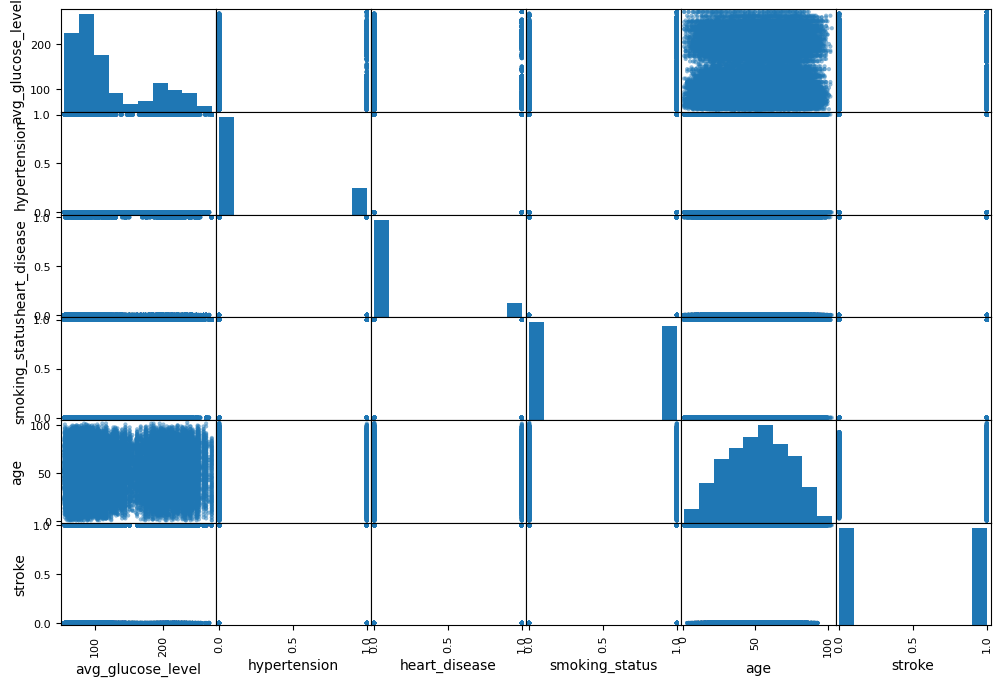

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['avg_glucose_level', 'hypertension','heart_disease', 'smoking_status','age', 'stroke']

scatter_matrix(df1[attributes], figsize=(12,8))


# Normalization
Since the value of bmi and avg_glucose_level can be a large number compare to other features, we use some method to scale it between 0 to 1.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

#numerical_features = ['age', 'avg_glucose_level', 'bmi']

X = df1.drop('stroke', axis=1)  # Extract features from the DataFrame
y = df1['stroke']  # Extract the target variable

scaler = StandardScaler()

#scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training set
X = scaler.fit_transform(X)


# Assuming the target column is named 'label'

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# Model Selection
*   The problem we are facing is an classification problem so we are choosing 1 out 3 model
*   Model: Logistic Regression, Multi-layer Perceptron Classifer and Decision Tree





In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

'''
#Load the dataset
dataset = pd.read_csv('/content/datasetAfterClean.csv')
'''
#Create and train the Neural Network Classifier
NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
NN.fit(X_train, y_train)

#Predict the labels of the test data
y_pred = NN.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
confusion_mat = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Step 8: Print the results
print("Accuracy for Neural Network is:", accuracy)
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_mat, index=NN.classes_, columns=NN.classes_))
print("\nClassification Report:")
print(classification)


Accuracy for Neural Network is: 81.30633411532287

Confusion Matrix:
      0     1
0  3314   763
1   751  3271

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4077
           1       0.81      0.81      0.81      4022

    accuracy                           0.81      8099
   macro avg       0.81      0.81      0.81      8099
weighted avg       0.81      0.81      0.81      8099



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Load the prepared dataset
# dataset = pd.read_csv('/datasetAfterClean.csv')

# Create the decision tree classifier
model = DecisionTreeClassifier()

# Train the decision tree model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
confusion_mat = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy for decision tree is:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification)



Accuracy for decision tree is: 99.87652796641561
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4077
           1       1.00      1.00      1.00      4022

    accuracy                           1.00      8099
   macro avg       1.00      1.00      1.00      8099
weighted avg       1.00      1.00      1.00      8099



"\n# Measure the time taken for training\nstart_time = time.time()\nmodel.fit(X_train, y_train)\nend_time = time.time()\n\n# Calculate the training time\ntraining_time = end_time - start_time\n\n# Store the dataset size and training time\ndataset_sizes.append(size)\ntraining_times.append(training_time)\n# Plot the training time as a function of the number of iterations\nplt.plot(dataset_sizes, training_times)\nplt.xlabel('Number of Iterations')\nplt.ylabel('Training Time (seconds)')\nplt.title('Training Time vs. Number of Iterations')\nplt.show()\n"

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
model1 = LogisticRegression()

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy for Logistic Regression is:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification)

Accuracy for LogisticRegression is: 0.9987652796641561
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4077
           1       1.00      1.00      1.00      4022

    accuracy                           1.00      8099
   macro avg       1.00      1.00      1.00      8099
weighted avg       1.00      1.00      1.00      8099



# Speculate
Since the prediction from decision tree and logistic regression is 100%, overfitting may be occured. We use the cross validation for the further evaluation.

In [ ]:
from sklearn.model_selection import cross_val_score

model_1 =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=100000)

cross_val_scores_1= cross_val_score(model_1, X_train, y_train, cv=10)

MLPClassifier_scores_1 = np.sqrt(cross_val_scores_1)

print('Score: ' , MLPClassifier_scores_1)
print('Mean', MLPClassifier_scores_1.mean())
print("Sd", MLPClassifier_scores_1.std())

Score:  [0.90369611 0.92262374 0.91453226 0.9150385  0.91064169 0.89422006
 0.90673443 0.90860522 0.910133   0.89921238]
Mean 0.9085437399989693
Sd 0.007760392392230097


In [ ]:
model_2 = DecisionTreeClassifier()

cross_val_scores_2 = cross_val_score(model_2, X_train, y_train, cv=10)

DecisionTree_scores_2 = np.sqrt(cross_val_scores_2)

print('Score: ' , DecisionTree_scores_2)
print('Mean', DecisionTree_scores_2.mean())
print("Sd", DecisionTree_scores_2.std())

Score:  [0.99830103 0.99984567 0.99876429 0.99953679 0.99860972 0.99907336
 0.99799119 0.99768178 0.99737228 0.99891884]
Mean 0.9986094931475108
Sd 0.0007477710319182587


In [ ]:
# Create a logistic regression model
model_3 = LogisticRegression()


cross_val_score_3 = cross_val_score(model_3, X_train, y_train ,cv = 10)
# Evaluate the model's performance

Log_reg_scores_3 = np.sqrt(cross_val_score_3)


print('Score: ' , Log_reg_scores_3)
print('Mean', Log_reg_scores_3.mean())
print("Sd", Log_reg_scores_3.std())


Score:  [0.82794555 0.82757268 0.83826369 0.81813348 0.83030736 0.82602019
 0.81851076 0.82189849 0.82452378 0.81737839]
Mean 0.8250554371773461
Sd 0.006144858564087754


# Find the best parameter for the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['sgd', 'adam']
}


# Create the MLPClassifier model
model_MLPClassifier = MLPClassifier(max_iter=500, verbose=10,  random_state=21, tol=0.000000001)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_MLPClassifier, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

In [ ]:
# The model after optimizating
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_11 =  MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

model_11.fit(X_train, y_train)
y_pred = model_11.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy for MLPClassifer is:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification)

Iteration 1, loss = 0.56304090
Iteration 2, loss = 0.49125052
Iteration 3, loss = 0.44575354
Iteration 4, loss = 0.40496358
Iteration 5, loss = 0.36866413
Iteration 6, loss = 0.33874278
Iteration 7, loss = 0.31434758
Iteration 8, loss = 0.28403346
Iteration 9, loss = 0.26019511
Iteration 10, loss = 0.24423469
Iteration 11, loss = 0.23030651
Iteration 12, loss = 0.21184469
Iteration 13, loss = 0.20425437
Iteration 14, loss = 0.19347286
Iteration 15, loss = 0.18546438
Iteration 16, loss = 0.17217485
Iteration 17, loss = 0.16868044
Iteration 18, loss = 0.16327358
Iteration 19, loss = 0.16028480
Iteration 20, loss = 0.14932264
Iteration 21, loss = 0.14317377
Iteration 22, loss = 0.13846987
Iteration 23, loss = 0.14849061
Iteration 24, loss = 0.13798849
Iteration 25, loss = 0.13158558
Iteration 26, loss = 0.12742527
Iteration 27, loss = 0.12236149
Iteration 28, loss = 0.11491146
Iteration 29, loss = 0.11979172
Iteration 30, loss = 0.11311708
Iteration 31, loss = 0.11250102
Iteration 32, los

# Learning Curve

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# Assuming you have a DataFrame named 'df' with the given features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Extract the features and target variable from the DataFrame
X = df1.drop('stroke', axis=1)
y = df1['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training set
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

# Transform the testing set using the fitted scaler from the training set
X_test_scaled = scaler.transform(X_test[numerical_features])

# Replace the original numerical features with the scaled values in the training set
X_train[numerical_features] = X_train_scaled

# Replace the original numerical features with the scaled values in the testing set
X_test[numerical_features] = X_test_scaled

X_train_decision = X_train.copy()
X_test_decsion = X_test.copy()
y_train_decision = y_train.copy()
y_test_decision = y_test.copy()

X_train_log = X_train.copy()
X_test_log = X_test.copy()
y_train_log = y_train.copy()
y_test_log = y_test.copy()

# Define the MLPClassifier with desired settings
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')

# Define the range of training set sizes for the learning curve
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]  # Adjust as desired

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train_decision, y_train_decision, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

NameError: ignored

Iteration 1, loss = 0.64327170
Iteration 2, loss = 0.58656979
Iteration 3, loss = 0.56514218
Iteration 4, loss = 0.54948322
Iteration 5, loss = 0.53623745
Iteration 6, loss = 0.53144000
Iteration 7, loss = 0.51444448
Iteration 8, loss = 0.50528485
Iteration 9, loss = 0.49148329
Iteration 10, loss = 0.48267506
Iteration 11, loss = 0.47314463
Iteration 12, loss = 0.46222325
Iteration 13, loss = 0.45330442
Iteration 14, loss = 0.44679372
Iteration 15, loss = 0.44002147
Iteration 16, loss = 0.42804853
Iteration 17, loss = 0.42579105
Iteration 18, loss = 0.41604544
Iteration 19, loss = 0.41129300
Iteration 20, loss = 0.40406734
Iteration 21, loss = 0.39610196
Iteration 22, loss = 0.39685724
Iteration 23, loss = 0.38842590
Iteration 24, loss = 0.38323587
Iteration 25, loss = 0.37158267
Iteration 26, loss = 0.36892012
Iteration 27, loss = 0.36300210
Iteration 28, loss = 0.35886827
Iteration 29, loss = 0.35547625
Iteration 30, loss = 0.35852777
Iteration 31, loss = 0.35287417
Iteration 32, los

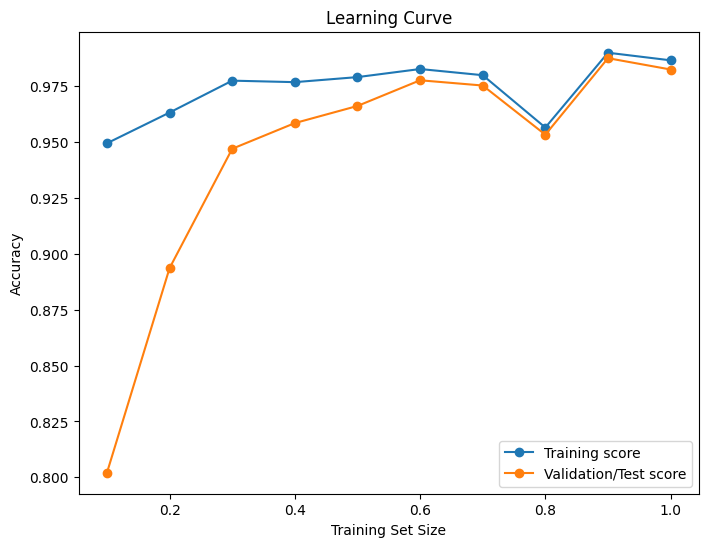

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


# Split the dataset into training and validation/test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the training set sizes you want to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize lists to store the performance metrics
train_scores = []
val_scores = []

# Iterate over the training set sizes
for train_size in train_sizes:
    # Set the number of samples based on the train_size
    num_samples = int(train_size * len(X_train))

    # Select a subset of the training data
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]

    # Create and train your machine learning model
    model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)
    model.fit(X_train_subset, y_train_subset)

    # Make predictions on the training and validation/test sets
    train_predictions = model.predict(X_train_subset)
    val_predictions = model.predict(X_val_test)

    # Calculate the performance scores
    train_score = accuracy_score(y_train_subset, train_predictions)
    val_score = accuracy_score(y_val_test, val_predictions)

    # Append the scores to the lists
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training score')
plt.plot(train_sizes, val_scores, 'o-', label='Validation/Test score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Time complexity

Iteration 1, loss = 5.13376333
Iteration 2, loss = 2.71103490
Iteration 3, loss = 0.82377813
Iteration 4, loss = 1.68814473
Iteration 5, loss = 2.16110999
Iteration 6, loss = 1.83793385
Iteration 7, loss = 1.15687698
Iteration 8, loss = 0.65495841
Iteration 9, loss = 0.81995832
Iteration 10, loss = 1.11564851
Iteration 11, loss = 1.24218021
Iteration 12, loss = 1.18598767
Iteration 13, loss = 0.99855469
Iteration 14, loss = 0.76850555
Iteration 15, loss = 0.62214656
Iteration 16, loss = 0.66873946
Iteration 17, loss = 0.82582761
Iteration 18, loss = 0.89996125
Iteration 19, loss = 0.83552590
Iteration 20, loss = 0.70038724
Iteration 21, loss = 0.61185019
Iteration 22, loss = 0.62618999
Iteration 23, loss = 0.69161230
Iteration 24, loss = 0.73867630
Iteration 25, loss = 0.73695577
Iteration 26, loss = 0.69186817
Iteration 27, loss = 0.63283400
Iteration 28, loss = 0.59772768
Iteration 29, loss = 0.60791931
Iteration 30, loss = 0.64480410
Iteration 31, loss = 0.66580361
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.16860525
Iteration 3, loss = 0.90517644
Iteration 4, loss = 1.32565055
Iteration 5, loss = 1.06219772
Iteration 6, loss = 0.81421201
Iteration 7, loss = 0.92507443
Iteration 8, loss = 0.68958325
Iteration 9, loss = 0.82191137
Iteration 10, loss = 0.70019314
Iteration 11, loss = 0.72210479
Iteration 12, loss = 0.69166039
Iteration 13, loss = 0.68578335
Iteration 14, loss = 0.67787337
Iteration 15, loss = 0.66572858
Iteration 16, loss = 0.66406452
Iteration 17, loss = 0.66179517
Iteration 18, loss = 0.66536890
Iteration 19, loss = 0.65704022
Iteration 20, loss = 0.65372943
Iteration 21, loss = 0.65430348
Iteration 22, loss = 0.65019737
Iteration 23, loss = 0.65239910
Iteration 24, loss = 0.64878258
Iteration 25, loss = 0.65034722
Iteration 26, loss = 0.65036595
Iteration 27, loss = 0.64995841
Iteration 28, loss = 0.64613548
Iteration 29, loss = 0.64475098
Iteration 30, loss = 0.64418477
Iteration 31, loss = 0.64382515
Iteration 32, loss = 0.64338578
Iteration 33, lo

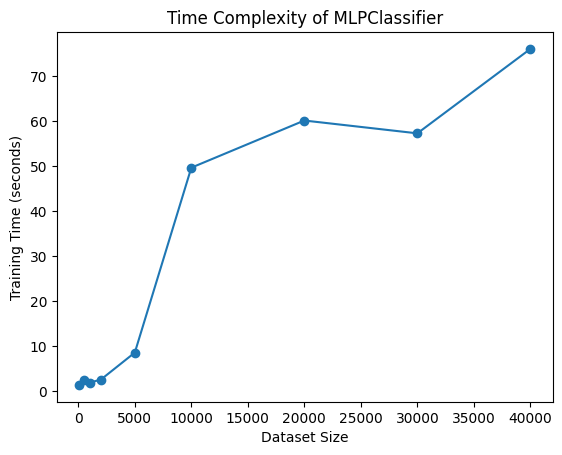

In [ ]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt



# Define the range of dataset sizes you want to test
dataset_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000]

# Define the hidden layer sizes for the MLPClassifier
hidden_layer_sizes = (100, 100)  # Adjust as desired

# Define a function to measure training time for different dataset sizes
def measure_training_time(dataset_sizes, hidden_layer_sizes):
    training_times = []

    for size in dataset_sizes:
        # Sample a subset of the data based on the desired size
        subset_df = df1.sample(n=size)

        # Split the subset into input features (X) and target variable (y)
        X = subset_df.drop('stroke', axis=1)  # Adjust 'target_variable' to the actual column name
        y = subset_df['stroke']

        # Define the MLPClassifier with desired settings
        mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

        # Start the timer
        start_time = time.time()

        # Train the MLPClassifier
        mlp.fit(X, y)

        # Calculate the elapsed time
        elapsed_time = time.time() - start_time
        training_times.append(elapsed_time)

    return training_times

# Measure training time for different dataset sizes
training_times = measure_training_time(dataset_sizes, hidden_layer_sizes)

# Plot the graph
plt.plot(dataset_sizes, training_times, 'o-')
plt.xlabel('Dataset Size')
plt.ylabel('Training Time (seconds)')
plt.title('Time Complexity of MLPClassifier')
plt.show()